In [1]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-08-25 15:56:39.130294: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def bland_altman_plot(y_actual, y_estimetd):

    y_actual = y_actual.reshape((-1,1))
    y_estimetd = y_estimetd.reshape((-1,1))
    error = y_actual - y_estimetd
    x_axis = 0.5 * (y_actual + y_estimetd)
    mean_value = np.mean(error)
    std_value = np.std(error)

    print("Mean-1.96SD is {:.2f} and  Mean+1.96SD is {:.2f}".format(mean_value-1.96*std_value,mean_value+1.96*std_value))


    plt.figure(dpi=150)

    plt.plot(x_axis,error,'*')
    plt.axhline(y=mean_value, color='black',label='Mean value')
    plt.axhline(y=mean_value - 1.96 * std_value, color='red',ls='--',label='Upper and Lower 95% CI')
    plt.axhline(y=mean_value + 1.96 * std_value,ls='--',color='red')
    plt.legend()
    plt.xlabel('Averages (years)')
    plt.ylabel('Differences (years)')
    plt.title('The Bland-Altman Representation of Actual and Predicted Ages')

    plt.grid(which='both')
    plt.xlim([x_axis.min(), x_axis.max()])
    plt.ylim([error.min(), error.max()])
    return

In [3]:
# calculating metrics
def regression_metrics(y_actual, y_estimetd):
    y_actual = y_actual.reshape((-1,1))
    y_estimetd = y_estimetd.reshape((-1,1))
    error = y_actual - y_estimetd
    rmse = np.sqrt(np.mean(error**2))
    mae = np.mean(np.abs(error))
    r2 = r2_score(y_true=y_actual,y_pred=y_estimetd)
    cr = np.corrcoef(y_actual.T,y_estimetd.T)
    return rmse, mae,r2,cr


354/354 [==============================] - 0s 821us/step
RMSE is: 13.489585911459468, MAE is: 10.516201138928814, R2  is: 0.35026014500896463, correlation coefficient  is 0.6186900500888309
Mean-1.96SD is -28.26 and  Mean+1.96SD is 23.93


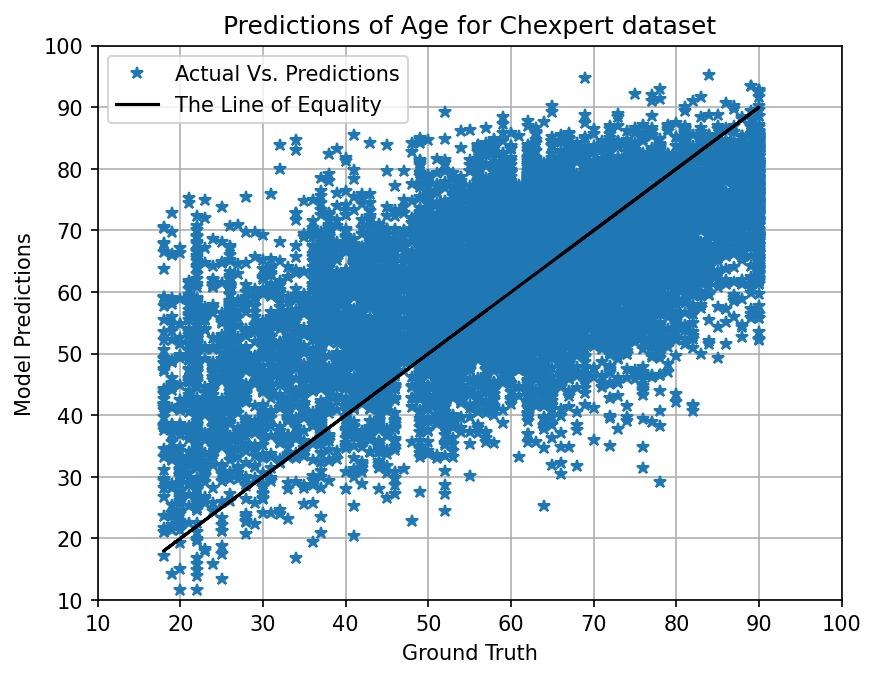

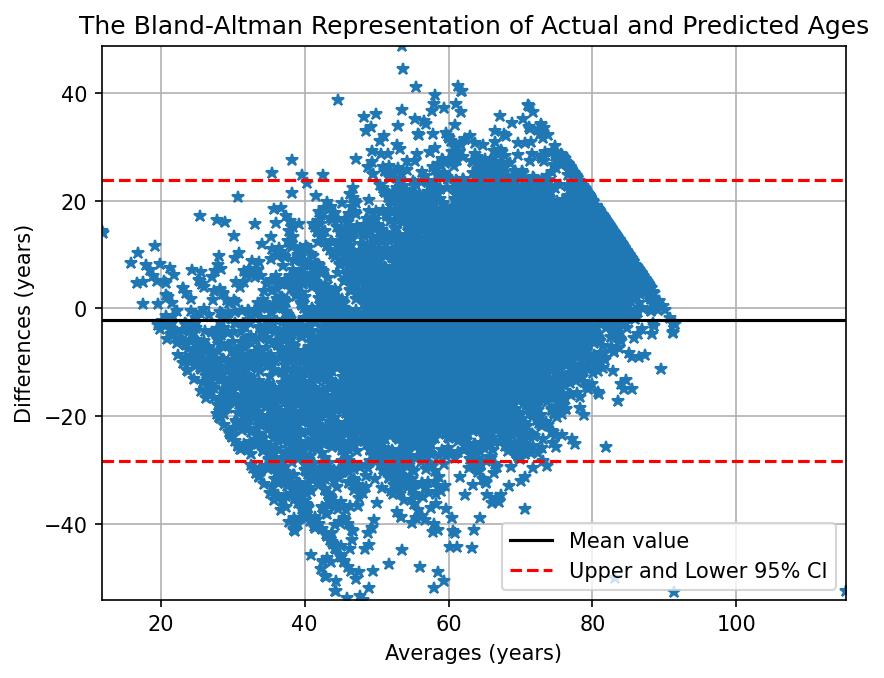

In [4]:
# chexpert agefull model:
name = 'chexpert_age_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
plt.figure(dpi=150)
plt.plot(y_chex_total,y_predict_chex_total,'*',label='Actual Vs. Predictions')
plt.plot(y_chex_total,y_chex_total,'k',label='The Line of Equality')
plt.legend()
plt.grid(which='both')
plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions')
plt.title('Predictions of Age for Chexpert dataset')
plt.xlim([10, 100])
plt.ylim([10, 100])

rmse, mae,r2,cr = regression_metrics(y_actual=y_chex_total,y_estimetd=y_predict_chex_total)
print("RMSE is: {}, MAE is: {}, R2  is: {}, correlation coefficient  is {}".format(rmse,mae,r2,cr[0,1]))
bland_altman_plot(y_actual=y_chex_total, y_estimetd=y_predict_chex_total)

354/354 [==============================] - 0s 940us/step
RMSE is: 15.681042944560609, MAE is: 12.34110323281496, R2  is: 0.12200476529203463, correlation coefficient  is 0.394409084451035
Mean-1.96SD is -32.61 and  Mean+1.96SD is 28.26


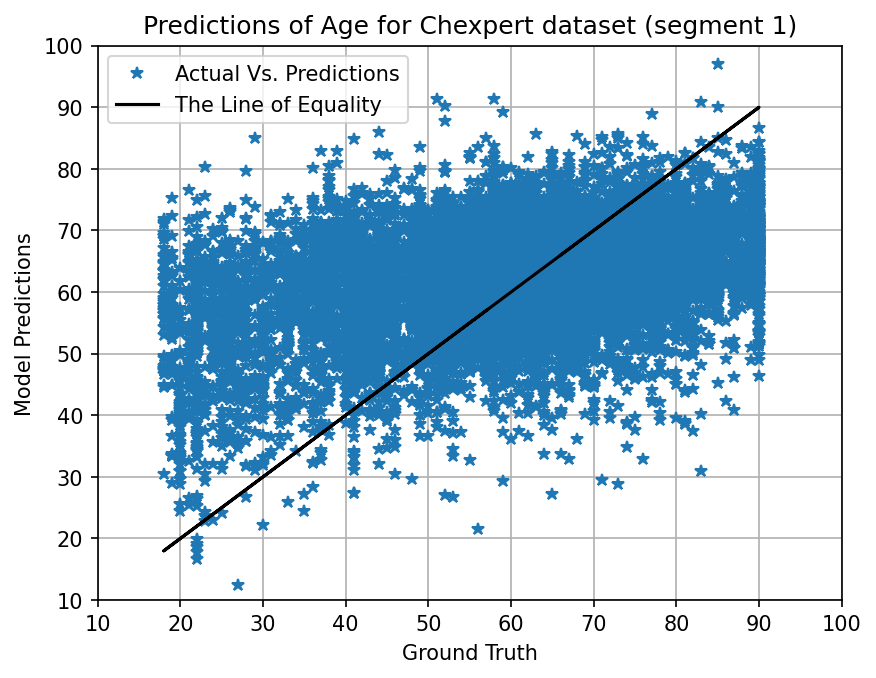

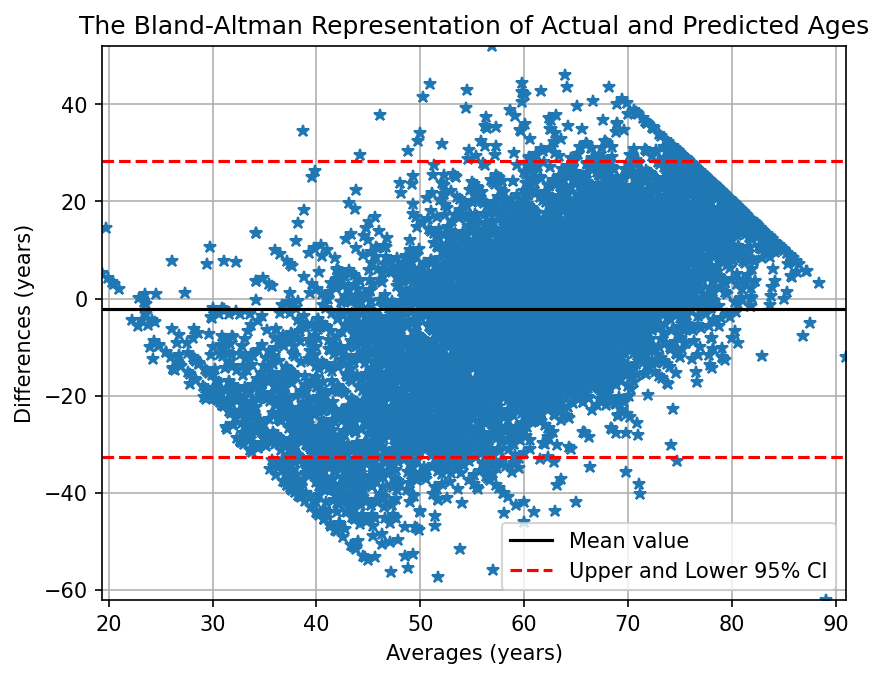

In [5]:
# chexpert age segment  1 model:
name = 'chexpert_age_segment_0_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_0 = test_data['x_test']
y_chex_seg_0 = test_data['y_test']
mask_chex_seg_0 = test_data['mask_excluded']
model_chex_seg_0 = load_model(name + '_mdl.h5')
y_predict_chex_seg_0 = model_chex_seg_0.predict(x_chex_seg_0[:,mask_chex_seg_0])
plt.figure(dpi=150)
plt.plot(y_chex_seg_0,y_predict_chex_seg_0,'*',label='Actual Vs. Predictions')
plt.plot(y_chex_seg_0,y_chex_seg_0,'k',label='The Line of Equality')
plt.legend()
plt.grid(which='both')
plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions')
plt.title('Predictions of Age for Chexpert dataset (segment 1)')
plt.xlim([10, 100])
plt.ylim([10, 100])
rmse, mae,r2 ,cr = regression_metrics(y_actual=y_chex_seg_0,y_estimetd=y_predict_chex_seg_0)
print("RMSE is: {}, MAE is: {}, R2  is: {}, correlation coefficient  is {}".format(rmse,mae,r2,cr[0,1]))
bland_altman_plot(y_actual=y_chex_seg_0, y_estimetd=y_predict_chex_seg_0)

354/354 [==============================] - 0s 670us/step
RMSE is: 16.012455503572912, MAE is: 12.624002947803515, R2  is: 0.08450043511030725, correlation coefficient  is 0.3772911238255025
Mean-1.96SD is -33.29 and  Mean+1.96SD is 28.87


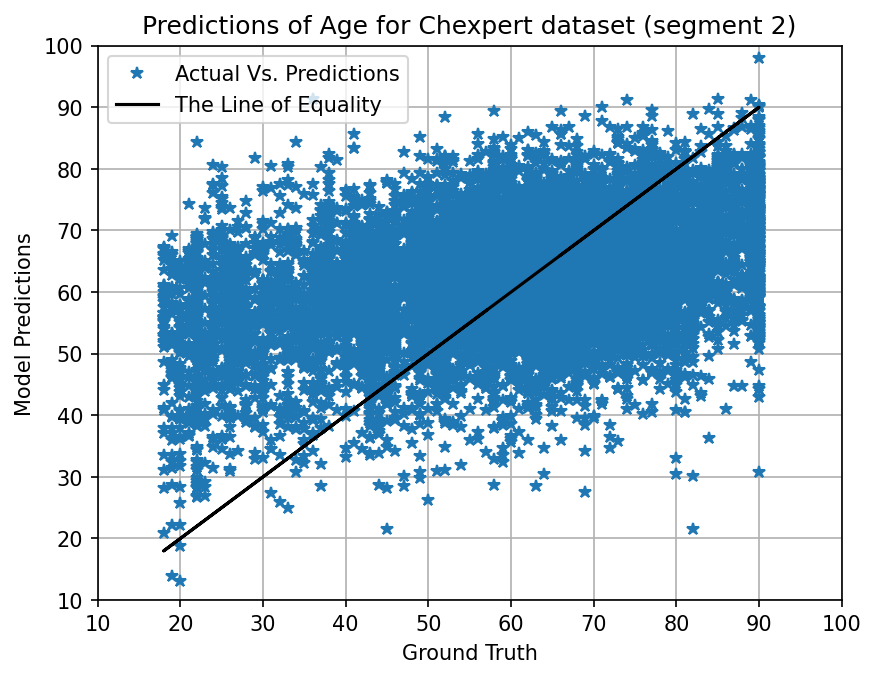

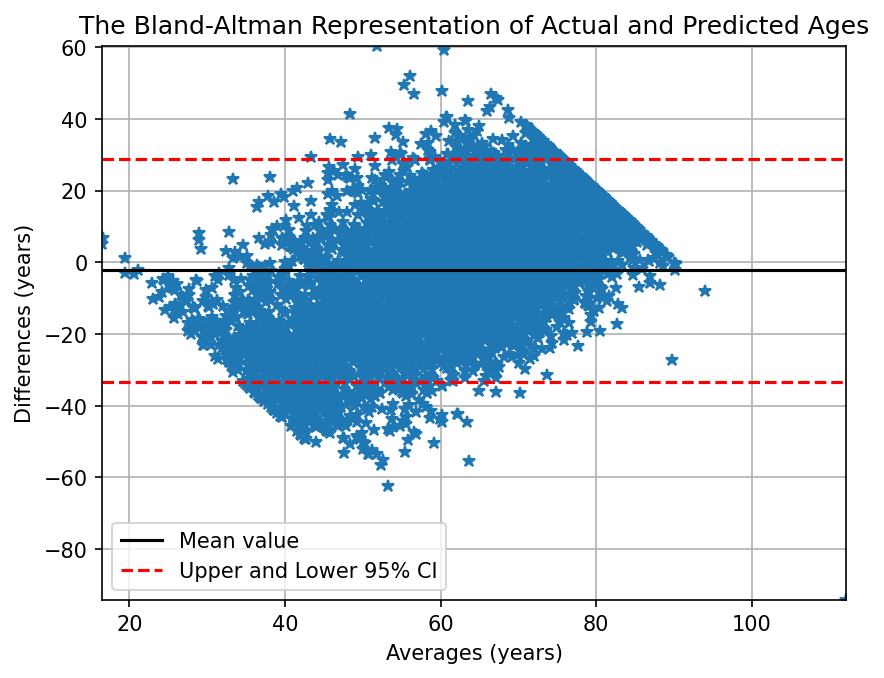

In [6]:
name = 'chexpert_age_segment_1_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_1 = test_data['x_test']
y_chex_seg_1 = test_data['y_test']
mask_chex_seg_1 = test_data['mask_excluded']
model_chex_seg_1 = load_model(name + '_mdl.h5')
y_predict_chex_seg_1 = model_chex_seg_1.predict(x_chex_seg_1[:,mask_chex_seg_1])
plt.figure(dpi=150)
plt.plot(y_chex_seg_1,y_predict_chex_seg_1,'*',label='Actual Vs. Predictions')
plt.plot(y_chex_seg_1,y_chex_seg_1,'k',label='The Line of Equality')
plt.legend()
plt.grid(which='both')
plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions')
plt.xlim([10, 100])
plt.ylim([10, 100])
plt.title('Predictions of Age for Chexpert dataset (segment 2)')
rmse, mae,r2,cr = regression_metrics(y_actual=y_chex_seg_1,y_estimetd=y_predict_chex_seg_1)
print("RMSE is: {}, MAE is: {}, R2  is: {}, correlation coefficient  is {}".format(rmse,mae,r2,cr[0,1]))
bland_altman_plot(y_actual=y_chex_seg_1, y_estimetd=y_predict_chex_seg_1)

354/354 [==============================] - 1s 1ms/step
RMSE is: 15.637107063870799, MAE is: 12.197856651980466, R2  is: 0.126917889081268, correlation coefficient  is 0.40459220543546737
Mean-1.96SD is -32.85 and  Mean+1.96SD is 27.56


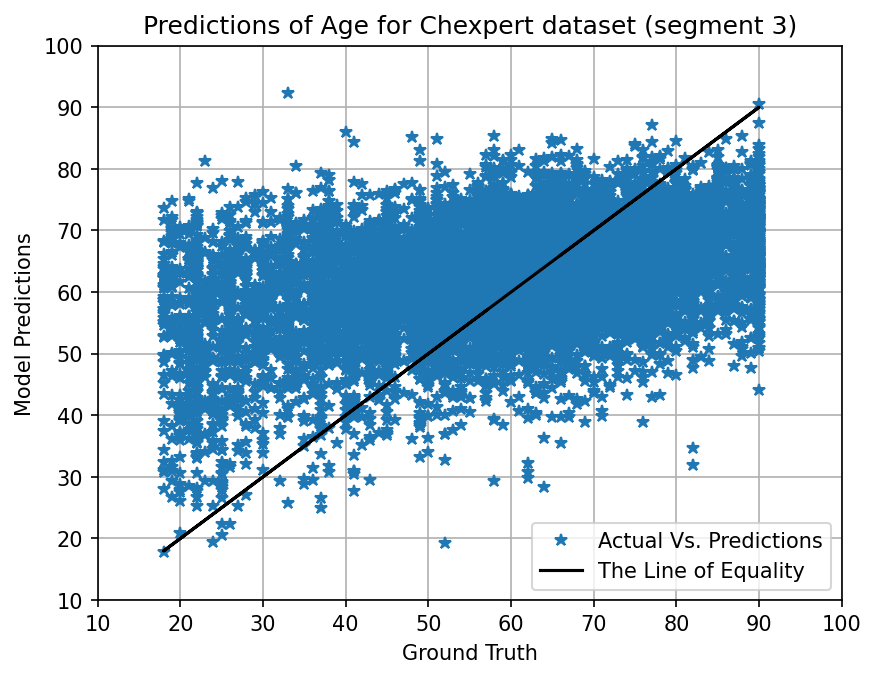

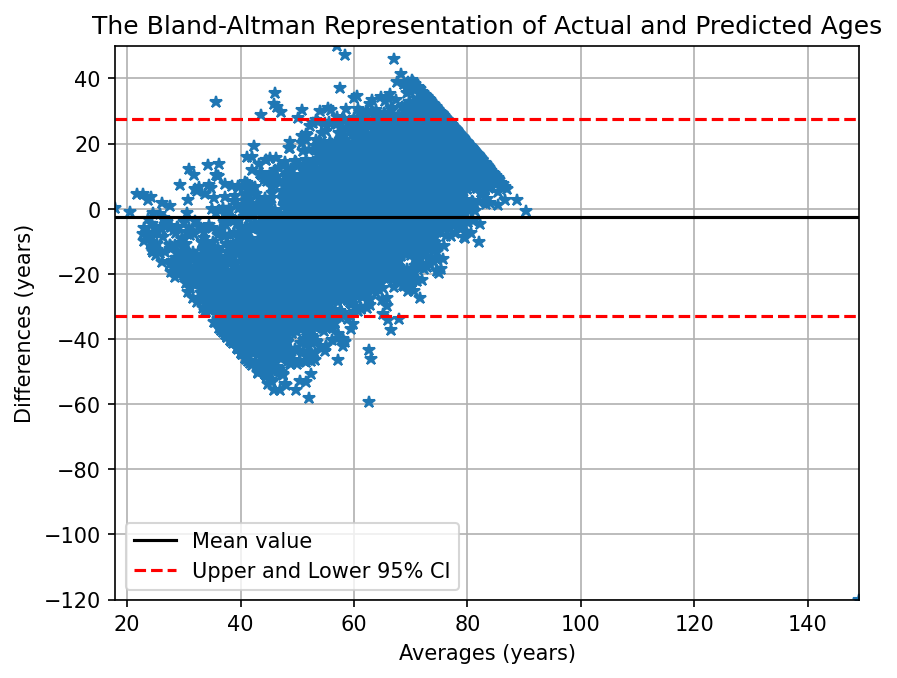

In [7]:
name = 'chexpert_age_segment_2_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_2 = test_data['x_test']
y_chex_seg_2 = test_data['y_test']
mask_chex_seg_2 = test_data['mask_excluded']
model_chex_seg_2 = load_model(name + '_mdl.h5')
y_predict_chex_seg_2 = model_chex_seg_2.predict(x_chex_seg_2[:,mask_chex_seg_2])
plt.figure(dpi=150)
plt.plot(y_chex_seg_2,y_predict_chex_seg_2,'*',label='Actual Vs. Predictions')
plt.plot(y_chex_seg_2,y_chex_seg_2,'k',label='The Line of Equality')
plt.legend()
plt.grid(which='both')
plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions')
plt.xlim([10, 100])
plt.ylim([10, 100])
plt.title('Predictions of Age for Chexpert dataset (segment 3)')
rmse, mae,r2,cr = regression_metrics(y_actual=y_chex_seg_2,y_estimetd=y_predict_chex_seg_2)
print("RMSE is: {}, MAE is: {}, R2  is: {}, correlation coefficient  is {}".format(rmse,mae,r2,cr[0,1]))
bland_altman_plot(y_actual=y_chex_seg_2, y_estimetd=y_predict_chex_seg_2)

354/354 [==============================] - 0s 934us/step
RMSE is: 15.354935710617598, MAE is: 11.980006527944992, R2  is: 0.15814310097538253, correlation coefficient  is 0.4661377055905388
Mean-1.96SD is -32.62 and  Mean+1.96SD is 26.26


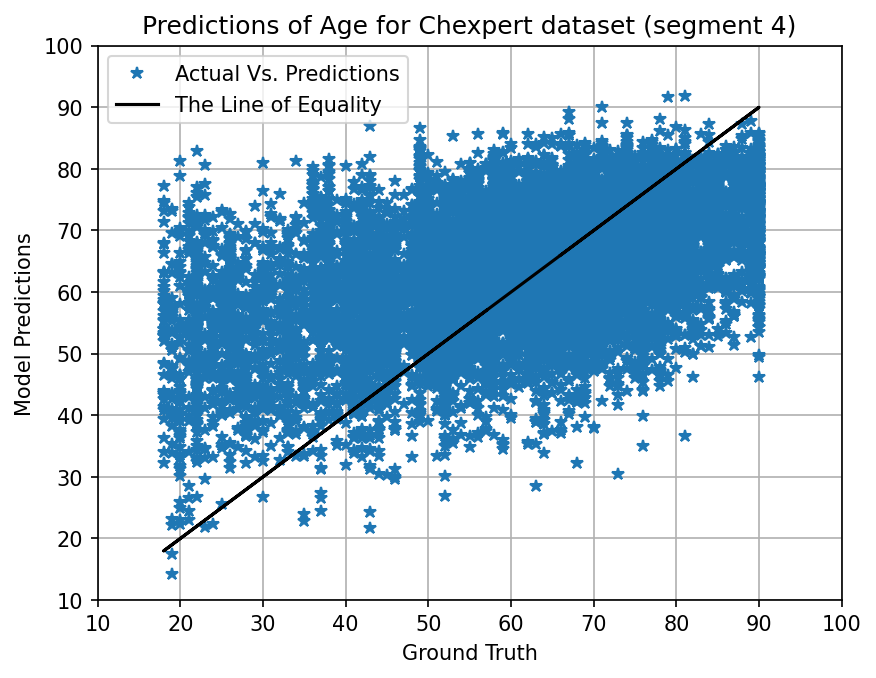

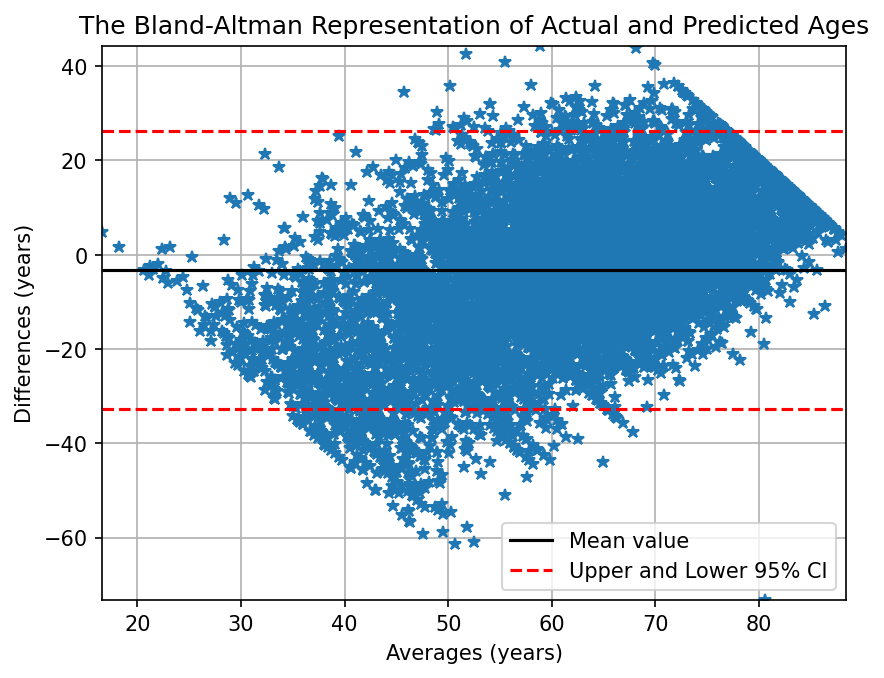

In [8]:
name = 'chexpert_age_segment_3_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_3 = test_data['x_test']
y_chex_seg_3 = test_data['y_test']
mask_chex_seg_3 = test_data['mask_excluded']
model_chex_seg_3 = load_model(name + '_mdl.h5')
y_predict_chex_seg_3 = model_chex_seg_3.predict(x_chex_seg_3[:,mask_chex_seg_3])
plt.figure(dpi=150)
plt.plot(y_chex_seg_3,y_predict_chex_seg_3,'*',label='Actual Vs. Predictions')
plt.plot(y_chex_seg_3,y_chex_seg_3,'k',label='The Line of Equality')
plt.legend()
plt.grid(which='both')
plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions')
plt.xlim([10, 100])
plt.ylim([10, 100])
plt.title('Predictions of Age for Chexpert dataset (segment 4)')
rmse, mae,r2,cr = regression_metrics(y_actual=y_chex_seg_3,y_estimetd=y_predict_chex_seg_3)
print("RMSE is: {}, MAE is: {}, R2  is: {}, correlation coefficient  is {}".format(rmse,mae,r2,cr[0,1]))
bland_altman_plot(y_actual=y_chex_seg_3, y_estimetd=y_predict_chex_seg_3)